In [10]:
#Run this cell to install the necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [59]:
#Run this cell to load the special plotting functions
def quant_data_bar(tbl, column_label, num_bins=10, x_min=None, x_max=None):
    """
    Plots a bar chart of quantitative data for a given input table and desired column.
    This function will bin the values of column_label and plot the counts of each bin on the
    y-axis.
    
    Parameters:
        tbl: A Table containing the data you would like to plot
        column_label: The name of the column to be binned and plotted on the x-axis
        num_bins (optional): The number of equal-width bins. By default, this function
                                uses 10 bins.
        x_min (optional): Desired lowest value on the horizontal axis; default is the 
                            minimum of the data in the specified column
        x_max (optional): Desired highest value on the horizontal axis; default is the 
                            maximum of the data in the specified column
    """
    tbl.hist(column_label, normed=False, bins=num_bins)
    ax = plt.gca()
    ax.set_xlim(left=x_min) if x_min else None

# *Above and Beyond*: Spotify Project Extension

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


If you listen to music, chances are you use Spotify, Apple Music, or another similar streaming service. This new era of the music industry curates playlists, recommends new artists, and is based on the number of streams more than the number of albums sold. The way these streaming services do this is (you guessed it) data!

Spotify, like many other companies, hire many full-time data scientists to analyze all the incoming user data and use it to make predictions and recommendations for users. If you're interested, feel free to check out [Spotify's Engineering Page](https://engineering.atspotify.com/) for more information!

<img src="images/spotify.png" width = 700/>

<center><a href=https://hrblog.spotify.com/2018/02/08/amping-up-diversity-inclusion-at-spotify/>Image Reference</a></center> 

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a Question or Problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and can be answered using the data. There are many different questions we could ask about music data. For example, there are many artists who want to find out how to get their music on Spotify's Discover Weekly playlist in order to gain exposure. Similarly, users love to see their *Spotify Wrapped* listening reports at the end of each year.

<div class="alert alert-warning">
    <b>Question:</b> Create a <i>new</i> research question that still remains unanswered after your initial investigation. For those who did not complete the Spotify project, work with another intern who has.
   </div>

**Original Question(s):** *here*


**Data you would need:** *here*


## Acquiring and Cleaning Data <a id='subsection 1b'></a>

We'll be looking at song data from Spotify. You can find the raw data [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-01-21). We've cleaned up the datasets a bit, and we will be investigating the popularity and the qualities of songs from this dataset.

The following table, `spotify`, contains a list of tracks identified by their unique song ID along with attributes about that track.

Here are the descriptions of the columns for your reference. (We will not be using all of these fields):

|Variable Name   | Description |
|--------------|------------|
|`track_id` | 	Song unique ID |
|`track_name` | Song Name |
|`track_artist	`| Song Artist |
|`track_popularity` | Song Popularity (0-100) where higher is better |
|`track_album_id`| Album unique ID |
|`track_album_name` | Song album name |
|`track_album_release_date`| Date when album released |
|`playlist_name`| Name of playlist |
|`playlist_id`| Playlist ID |
|`playlist_genre`| Playlist genre |
|`playlist_subgenre	`|  Playlist subgenre |
|`danceability`| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|`energy`| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|`key`| The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|`loudness`|  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
|`mode`|  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|`speechiness`|  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|`acousticness`|  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|`instrumentalness`| Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|`liveness`| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|`valence`| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|`tempo`| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|`duration_ms`| Duration of song in milliseconds |
|`creation_year`| Year when album was released |




In [3]:
spotify = Table.read_table('data/spotify.csv')
spotify.show(10)

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019


Since today's research focuses on analyzing differences between audio features, we can remove a few of the unnecessary columns above. Run the following cell to do so:

In [28]:
#KEY

desired_cols = make_array('track_id',
                             'track_name',
                             'playlist_genre',
                             'playlist_subgenre',
                             'danceability',
                             'energy',
                             'key',
                             'loudness',
                             'mode',
                             'speechiness',
                             'acousticness',
                             'instrumentalness',
                             'liveness',
                             'valence',
                             'tempo',
                             'duration_ms',
                         )
spotify = spotify.select(desired_cols)

In [30]:
spotify.show(5)

track_id,track_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052


## Conducting EDA: Rock vs. EDM

It's easy for us as humans to distinguish between distinct music genres. We listen to the music and -- just like magic -- are able to tell what genre a song will fall into. However, how does a computer do this?

In this section, we will investigate the audio features of different musical genres based on the songs in specific playlists. At the end, we will be able to see how a computer can tell the difference between **Rock** and **EDM**. We will be looking at the following feature columns:

|Variable Name   | Description |
|--------------|------------|
|`playlist_genre`| Playlist genre |
|`playlist_subgenre	`|  Playlist subgenre |
|`danceability`| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|`energy`| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|`key`| The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|`loudness`|  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
|`mode`|  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|`speechiness`|  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|`acousticness`|  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|`instrumentalness`| Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|`liveness`| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|`valence`| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|`tempo`| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|`duration_ms`| Duration of song in milliseconds |

### Separating the Data

<div class="alert alert-info">
        <b>Question:</b> Create two new tables called <code>rock</code> and <code>edm</code> which only have rows for the corresponding genre. Use the original table's <code>playlist_genre</code> column to obtain the genre.
</div>

In [42]:
#KEY

rock = spotify.where("playlist_genre", are.equal_to("rock"))
rock.show(5)

track_id,track_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
3YBZIN3rekqsKxbJc9FZko,Paradise City,rock,album rock,0.273,0.952,11,-8.762,1,0.0841,0.0169,0.0112,0.142,0.475,100.269,405640
5tqSUxm3Wpql0dlLMrIAp1,Shadow Of Your Love,rock,album rock,0.416,0.995,10,-5.376,0,0.119,0.000164,0.0902,0.34,0.33,112.014,185573
0bVtevEgtDIeRjCJbK3Lmv,Welcome To The Jungle,rock,album rock,0.446,0.954,8,-8.069,1,0.0764,0.0232,0.395,0.297,0.332,123.45,272027
63HA3dpnOmdDcazJ9sDfrh,It's So Easy,rock,album rock,0.375,0.973,8,-10.098,1,0.128,0.0134,9.52e-06,0.0947,0.218,150.636,201360
2vNw57KPaYDzkyPxXYUORX,Nightrain,rock,album rock,0.4,0.992,6,-6.995,1,0.0725,0.107,0.0113,0.179,0.243,149.41,266173


In [41]:
#KEY

edm = spotify.where("playlist_genre", are.equal_to("edm"))
edm.show(5)

track_id,track_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
366S9c0rQtvrkclcCSRNmB,"Disease - KATFYR ""Tokyo Bound"" Remix",edm,electro house,0.677,0.926,0,-3.307,1,0.0456,0.00298,0.507,0.337,0.108,128.014,288867
0nEeyKLtk5vTlbcdvgrCOH,Infinite Ammo,edm,electro house,0.597,0.96,7,-1.94,0,0.0627,9.38e-05,0.89,0.325,0.144,127.016,232637
4gxukDJiwApNEgVIh4pHgT,WOW,edm,electro house,0.601,0.99,6,-3.016,1,0.337,0.00116,0.52,0.124,0.192,127.958,148125
3mLLlN1ZdHmlJHkvNON7ou,Threnody - Bombs Away Remix,edm,electro house,0.836,0.926,2,-3.728,1,0.0495,0.000389,0.32,0.203,0.148,127.977,247309
17NCISfYJl0GITXs8G75Ae,Loudness War,edm,electro house,0.843,0.844,2,-4.779,1,0.0749,0.000609,0.166,0.0458,0.727,127.98,285000


###  Distributions 

Recall that you have used bar charts to visualize distributions of categorical data. The bar charts show how many individuals are in each category.

Bar charts can also be used to visualize distributions of quantitative data. We can create "categories" by grouping the data into intervals known as *bins*. Then we can count how many individuals are in each bin, and visualize the counts in a bar chart.

The function `quant_data_bar` has been written for this project, so that you can draw bar charts of quantitative data. It has two required arguments:

- the name of the data table
- the label of the column containing the data you want to visualize

The function draws a bar chart of the data in the specified column, using 10 bins of equal width.

Let's practice using this function before we dive into our analysis. Run the following cell to see a quantitative bar chart of the overall table's `danceability` column.

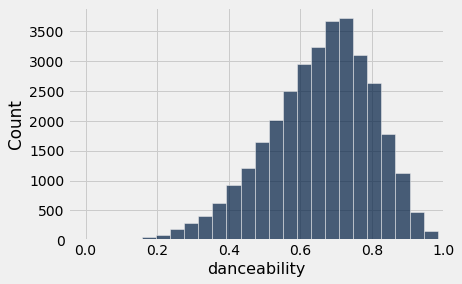

In [44]:
quant_data_bar(spotify, "danceability", num_bins=25, x_min=0, x_max=1)

<div class="alert alert-info">
        <b>Question:</b> How can we interpret the graph we just created in the cell above? Why do the numbers range from 0 to 1. What does the shape of the plot mean?
</div>

*INSERT ANSWER HERE*

### Instrumentalness

A track's **instrumentalness** predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

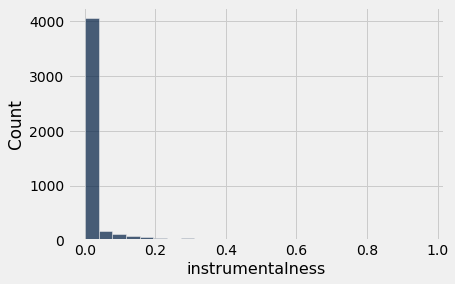

In [48]:
#KEY

quant_data_bar(rock, "instrumentalness", num_bins=25)

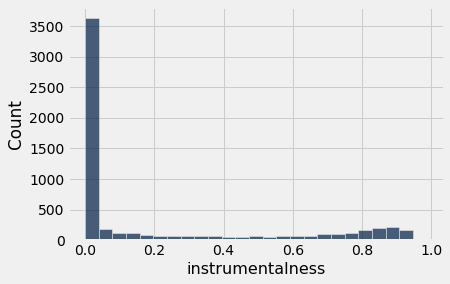

In [47]:
#KEY

quant_data_bar(edm, "instrumentalness", num_bins=25)

<div class="alert alert-info">
        <b>Question:</b> Compare the quantitative bar charts between <b>Rock</b> and <b>EDM</b>. What do the data points around 0.8 represent for the <b>EDM</b> plot? Why might that exist?
</div>

### Valence

A track's **valence** is defined as a measure from 0.0 to 1.0 describing the musical positiveness conveyed by that track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

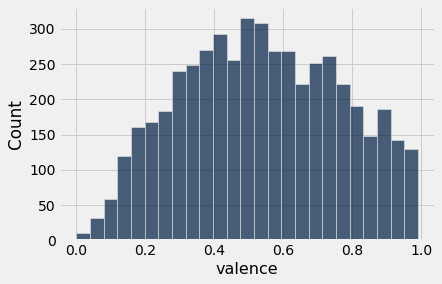

In [50]:
#KEY

quant_data_bar(rock, "valence", num_bins=25)

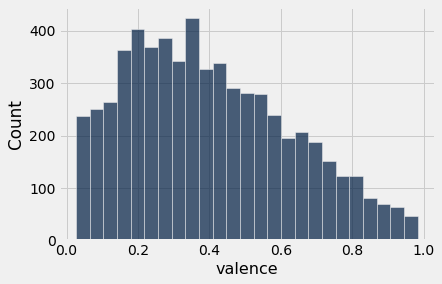

In [51]:
#KEY

quant_data_bar(edm, "valence", num_bins=25)

<div class="alert alert-info">
        <b>Question:</b> Compare the quantitative bar charts between <b>Rock</b> and <b>EDM</b>. How do the distributions differ? Why do more EDM songs have lower valence?
</div>

*INSERT ANSWER HERE*

### Tempo

A track's **tempo** is measured in terms of beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

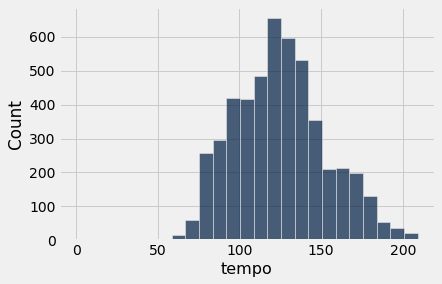

In [52]:
#KEY

quant_data_bar(rock, "tempo", num_bins=25)

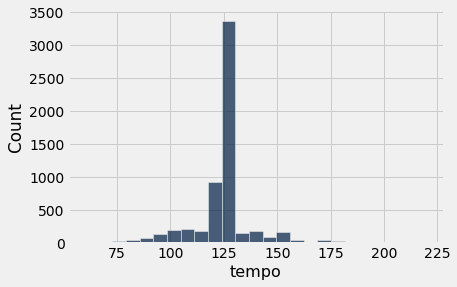

In [53]:
#KEY

quant_data_bar(edm, "tempo", num_bins=25)

<div class="alert alert-info">
        <b>Question:</b> Compare the quantitative bar charts between <b>Rock</b> and <b>EDM</b>. Specifically, look at the counts on the y-axis. Make some comments about the <i>spread</i> of the data.
</div>

*INSERT ANSWER HERE*

### Song Duration

A track's **song duration** is the length of the track, in milliseconds.

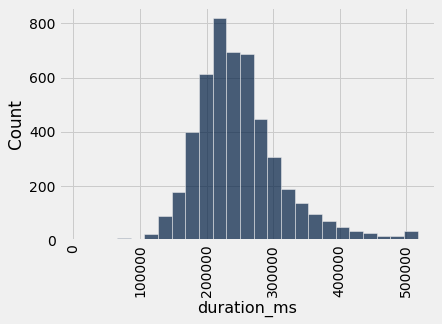

In [54]:
#KEY

quant_data_bar(rock, "duration_ms", num_bins=25)

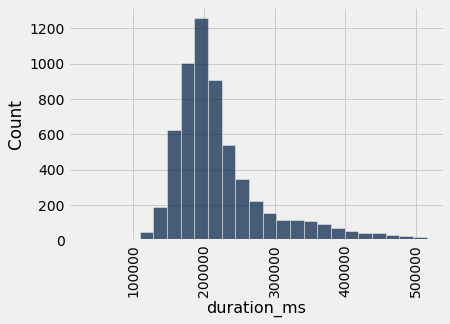

In [55]:
#KEY

quant_data_bar(edm, "duration_ms", num_bins=25)

<div class="alert alert-info">
        <b>Question:</b> What conclusions can we make about the average song length for a rock song vs. an EDM song?

*INSERT ANSWER HERE*

### Your Choice!

Now that we have looked at some major differences between `instrumentalness`, `valence`, `tempo`, and `duration_ms` between rock songs and EDM songs, it is your turn to investigate! In the following cells, please work with your partner / group to decide on:
- Two genres to investigate (not Rock and EDM)
- Three audio features to look at for each genre

After making your selections, carry out a similar process as above on your own.

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have looked at the different ways that audio features can be used to distinguish between certain musical genres, it is time to answer our intial question: 
>*How can machines tell the difference between different genres of music?*

Answer the following questions to wrap up you extended research

<div class="alert alert-info"> 
<b>Question:</b> After comparing audio features of rock and EDM songs, tell us something interesting about this data. What detail were you able to uncover?

</div>

*INSERT ANSWER HERE*

<div class="alert alert-info"> 
<b>Question:</b> What are the limitations of using audio features to automatically identify genres? Can you think of an examples where this may be a bad approach?
</div>

*INSERT ANSWER HERE*

<div class="alert alert-info"> 
<b>Question:</b> What other data could be used to determine a song's genre? How else can we use technology to group songs into categories?
</div>

*INSERT ANSWER HERE*

<div class="alert alert-success" role="alert">
  <h2 class="alert-heading">Well done!</h2>
    <p>In this report you used Spotify audio feature data from their Web API to determine how a machine can identify music genres automatically and how we can use data to **see** the difference between a rock song and an EDM song.
    <hr>
    <p> Notebook created for Berkeley Unboxing Data Science 2021 
    <p> Adapted from Project 2: Spotify by Will Furtado with the support of Ani Adhikari, Deb Nolan, and Carlos Ortiz
</div>